In [1]:
import pandas as pd

In [12]:
df = pd.read_csv("emotion_sentimen_dataset.csv")
addy = pd.DataFrame(df)
addy.head()

,Unnamed: 0,text,Emotion
0,0,i seriously hate one subject to death but now ...,hate
1,1,im so full of life i feel appalled,neutral
2,2,i sit here to write i start to dig out my feel...,neutral
3,3,ive been really angry with r and i feel like a...,anger
4,4,i feel suspicious if there is no one outside l...,neutral


In [13]:
addy.tail()

,Unnamed: 0,text,Emotion
839550,839550,i feel like telling these horny devils to find...,neutral
839551,839551,i began to realize that when i was feeling agi...,neutral
839552,839552,i feel very curious be why previous early dawn...,neutral
839553,839553,i feel that becuase of the tyranical nature of...,neutral
839554,839554,i think that after i had spent some time inves...,neutral


In [14]:
addy.shape

(839555, 3)

In [15]:
addy.isnull().sum()

Unnamed: 0    0
text          0
Emotion       0
dtype: int64

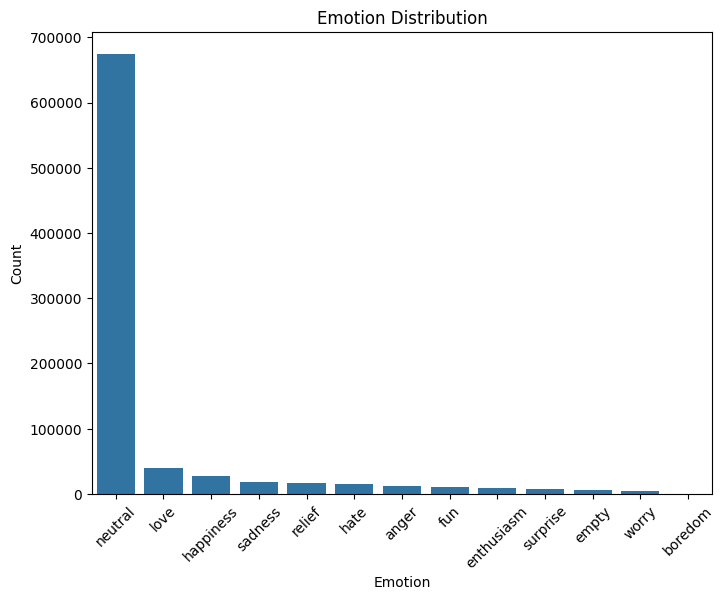

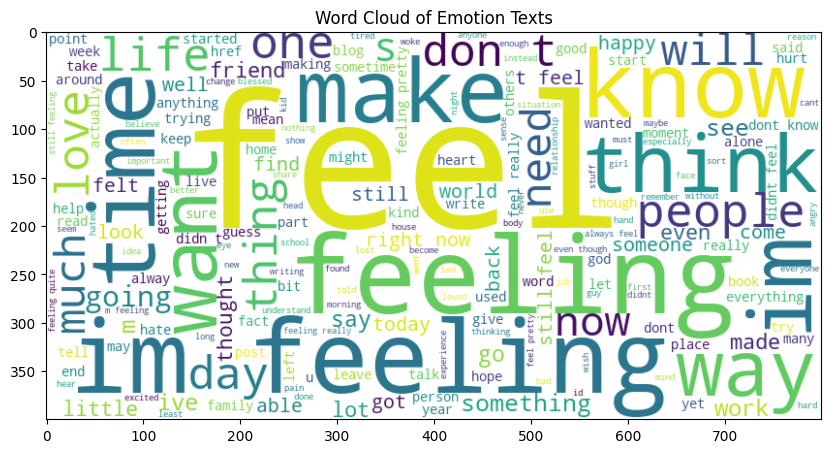

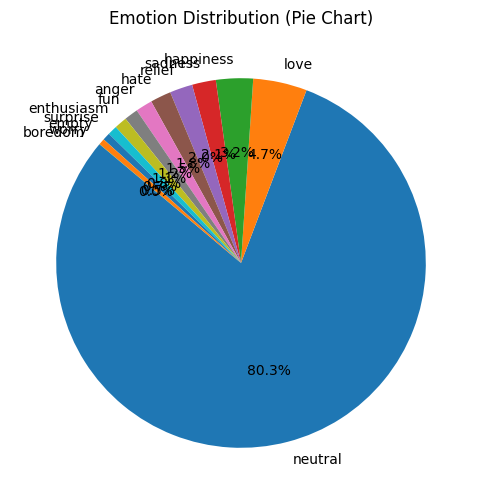

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('emotion_sentimen_dataset.csv')

# Count of each emotion category
emotion_counts = data['Emotion'].value_counts()

# Bar plot for emotion counts
plt.figure(figsize=(8, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values)
plt.title('Emotion Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

# Word cloud for the most frequent words
from wordcloud import WordCloud

# Combine all texts
all_text = ' '.join(data['text'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Emotion Texts')

plt.show()

# Pie chart for class distribution
plt.figure(figsize=(8, 6))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Emotion Distribution (Pie Chart)')

plt.show()



In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

def evaluate_model(X, y):
    # Split the dataset into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the model
    tfidf_vectorizer = TfidfVectorizer()
    model = make_pipeline(tfidf_vectorizer, MultinomialNB())
    model.fit(X_train, y_train)
    
    # Predict the labels on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Generate classification report
    report = classification_report(y_test, y_pred, zero_division=1)
    
    return accuracy, report

if __name__ == "__main__":
    try:
        data = pd.read_csv('emotion_sentimen_dataset.csv')
    except FileNotFoundError:
        print("Error: Dataset file 'emotion_sentimen_dataset.csv' not found.")
        exit()

    # Assuming 'text' column contains the features and 'Emotion' column contains the labels
    X = data['text']
    y = data['Emotion']

    # Evaluate the model accuracy and generate classification report
    accuracy, report = evaluate_model(X, y)
    
    print(f"Accuracy of the model: {accuracy}")
    print("Classification Report:")
    print(report)


Accuracy of the model: 0.831851397466515
Classification Report:
              precision    recall  f1-score   support

       anger       0.98      0.09      0.17      2489
     boredom       1.00      0.00      0.00        21
       empty       1.00      0.06      0.12      1096
  enthusiasm       0.99      0.07      0.13      1839
         fun       0.96      0.04      0.09      1977
   happiness       0.95      0.17      0.29      5370
        hate       0.97      0.13      0.23      3018
        love       0.91      0.25      0.39      8001
     neutral       0.83      1.00      0.91    134999
      relief       0.96      0.06      0.12      3396
     sadness       0.96      0.19      0.31      3428
    surprise       1.00      0.05      0.09      1372
       worry       1.00      0.00      0.00       905

    accuracy                           0.83    167911
   macro avg       0.96      0.16      0.22    167911
weighted avg       0.85      0.83      0.78    167911

